<a href="https://colab.research.google.com/github/eduardagoulart/pandas_study/blob/master/03_group_and_aggregate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/sample_data/vgsales.csv")

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


To study group and aggregate, we will use a dataset about video game sales.

We can see how many video games were sold in each region of the world by genre.


In [8]:
df.groupby("Genre")["NA_Sales"].sum()

Genre
Action          877.83
Adventure       105.80
Fighting        223.59
Misc            410.24
Platform        447.05
Puzzle          123.78
Racing          359.42
Role-Playing    327.28
Shooter         582.60
Simulation      183.31
Sports          683.35
Strategy         68.70
Name: NA_Sales, dtype: float64

In [15]:
# we can group by multiple values and columns
groupbed_df = df.groupby(["Platform", "Publisher"])[
                                  ["NA_Sales", "EU_Sales", "JP_Sales", 
                                   "Global_Sales"]].sum()
groupbed_df

NA_Sales  ...  Global_Sales
Platform Publisher                                         ...              
2600     20th Century Fox Video Games                1.82  ...          1.94
         Activision                                 18.17  ...         19.42
         Answer Software                             0.46  ...          0.50
         Atari                                      46.69  ...         50.09
         Avalon Interactive                          0.15  ...          0.17
...                                                   ...  ...           ...
XOne     Telltale Games                              0.26  ...          0.46
         Tru Blu Entertainment                       0.00  ...          0.05
         Ubisoft                                    10.50  ...         17.91
         Unknown                                     0.02  ...          0.03
         Warner Bros. Interactive Entertainment      5.44  ...          9.20

[1801 rows x 4 columns]

We are now separating the data by each platform and the games publisher. After that, we sum all the sales in each place.

the Platform and Publisher are no longer at the same level as the other columns, this means we now have two new index that are the keys we used in the groupby

In [16]:
# to access the keys from groupby as columns, we can reset them
groupbed_df.reset_index()

,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2600,20th Century Fox Video Games,1.82,0.10,0.00,1.94
1,2600,Activision,18.17,1.08,0.00,19.42
2,2600,Answer Software,0.46,0.03,0.00,0.50
3,2600,Atari,46.69,2.86,0.00,50.09
4,2600,Avalon Interactive,0.15,0.01,0.00,0.17
...,...,...,...,...,...,...
1796,XOne,Telltale Games,0.26,0.17,0.00,0.46
1797,XOne,Tru Blu Entertainment,0.00,0.05,0.00,0.05
1798,XOne,Ubisoft,10.50,5.85,0.01,17.91
1799,XOne,Unknown,0.02,0.00,0.00,0.03


we can count how many genres each platform or publisher has made

In [17]:
# grouping by publisher
df.groupby("Publisher")["Genre"].nunique()

Publisher
10TACLE Studios                 3
1C Company                      3
20th Century Fox Video Games    2
2D Boy                          1
3DO                             9
                               ..
id Software                     1
imageepoch Inc.                 2
inXile Entertainment            1
mixi, Inc                       1
responDESIGN                    1
Name: Genre, Length: 578, dtype: int64

### Basic Plot

we can plot simple graphs only using pandas

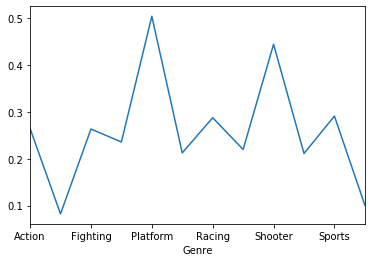

In [20]:
df.groupby("Genre")["NA_Sales"].mean().plot()